# CS6421 Assignment 2: Autoencoders

This assignment will focus on designing denoising autoencoders.

<a target="_blank" href="https://colab.research.google.com/github/andrew-nash/CS6421-labs-2025/blob/main/CS6421_Assignment_02.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Due on  20/03/2025 at 23:59:59 UTC

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Implementing A CNN-Based Denoising Auto-encoder

For task 1, we will fit a denoising autoencoder to the MNIST data.

We will train the autoencoder by fitting noisy inputs against clean outputs. We will manually add the noise to the inoputs

### Data

In [ ]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

np.random.seed(42)
x_train_noisy = x_train + np.random.normal(loc=0.0, scale=0.75, size=x_train.shape)
x_test_noisy = x_test + np.random.normal(loc=0.0, scale=0.75, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

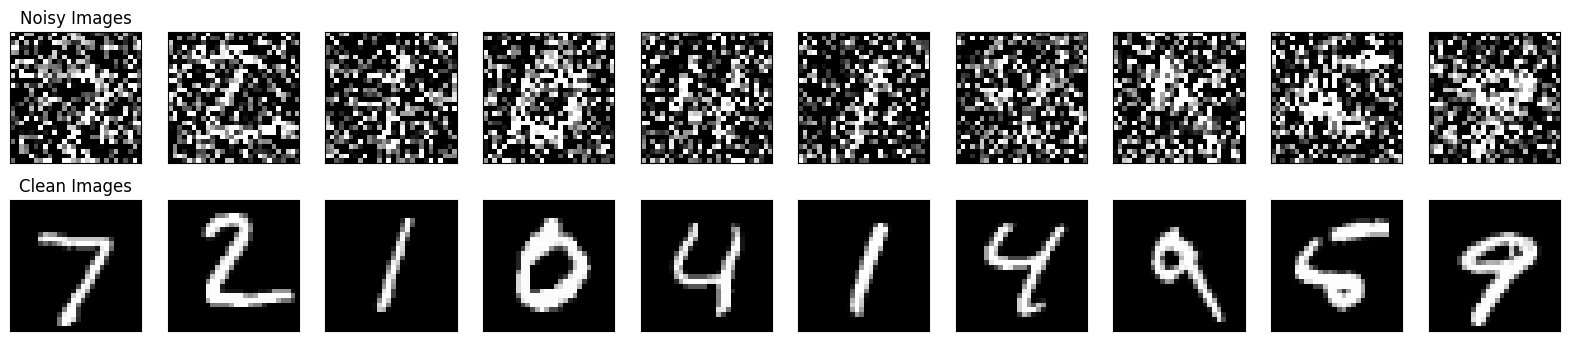

In [ ]:
bn = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
      ax.set_title('Noisy Images')
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Clean Images')

plt.show()


In [ ]:
class AutoEncoder(tf.keras.models.Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      tf.keras.layers.Conv2D(8, (2, 2), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Conv2DTranspose(8,(3,3),strides=(2,2),activation='relu',padding='same'),
      tf.keras.layers.Conv2DTranspose(8,(3,3),strides=(2,2),activation='relu',padding='same'),
       tf.keras.layers.Conv2D(1,(3,3),strides=(1,1),activation='relu',padding='same'),
      ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AutoEncoder()

autoencoder.compile(optimizer='adam', loss='mse')



tensorboard_callback = tf.keras.callbacks.TensorBoard(f"./tboard/dense_basic", histogram_freq=1)
autoencoder.fit(x_train_noisy, x_train,
          epochs=10,
          batch_size=512,
          validation_split=0.8,
          shuffle=True, callbacks=[tensorboard_callback])

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - loss: 0.1032 - val_loss: 0.0871
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 954ms/step - loss: 0.0844 - val_loss: 0.0713
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - loss: 0.0646 - val_loss: 0.0485
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - loss: 0.0471 - val_loss: 0.0450
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - loss: 0.0443 - val_loss: 0.0428
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - loss: 0.0419 - val_loss: 0.0409
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 900ms/step - loss: 0.0401 - val_loss: 0.0392
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - loss: 0.0384 - val_loss: 0.0380
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - loss: 0.0373 - val_loss: 0.0371
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 923ms/step - loss: 0.0363 - val_loss: 0.0363
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - loss: 0.0356 - val_loss: 0.0357
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 34s 907ms/step - loss: 0.0

When defining a CNN-based autoencoder, you have to pay carfeul attention to the `strides`, to make sure that the input and output dimensions are the same.

The last layer can be a Conv2D or a Conv2DTranspose - so long as it only has a single filter, to correspond to the single channel in the input image.

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 8)           │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 8)             │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 8)             │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 944 (3.69 KB)

 Trainable params: 944 (3.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.decoder.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose_12                  │ (None, 8, 8, 8)             │             584 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_13                  │ (None, 16, 16, 8)           │             584 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_14                  │ (None, 32, 32, 16)          │           1,168 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_15                  │ (None, 32, 32, 1)           │             145 │
│ (Conv2DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

#### Visualizations

Compare, original, noisy and reconstructed outputs:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


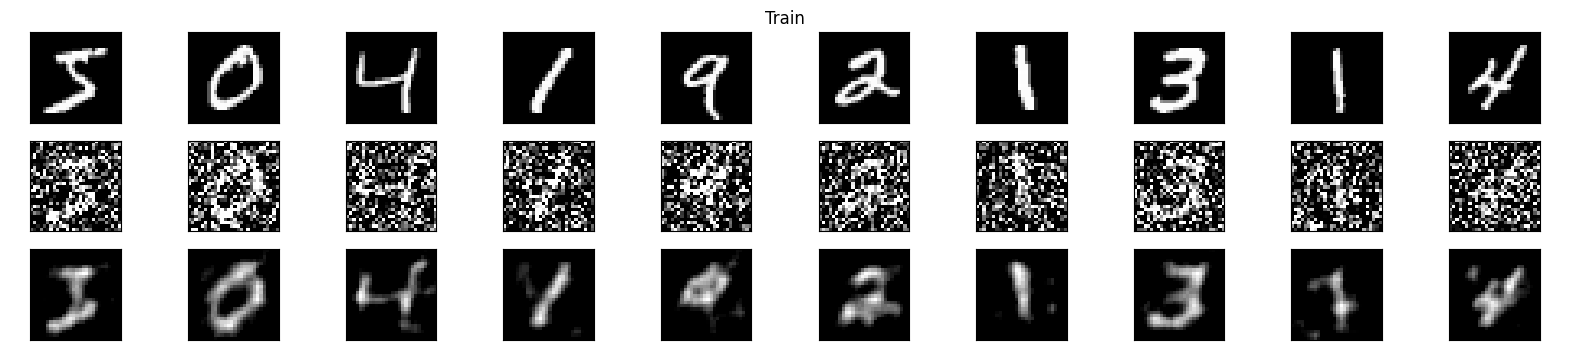

In [ ]:
n = 10
decoded_imgs = autoencoder.predict(x_train_noisy[:n])

plt.figure(figsize=(20, 4))
plt.title("Train")
plt.axis('off')
for i in range(10):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


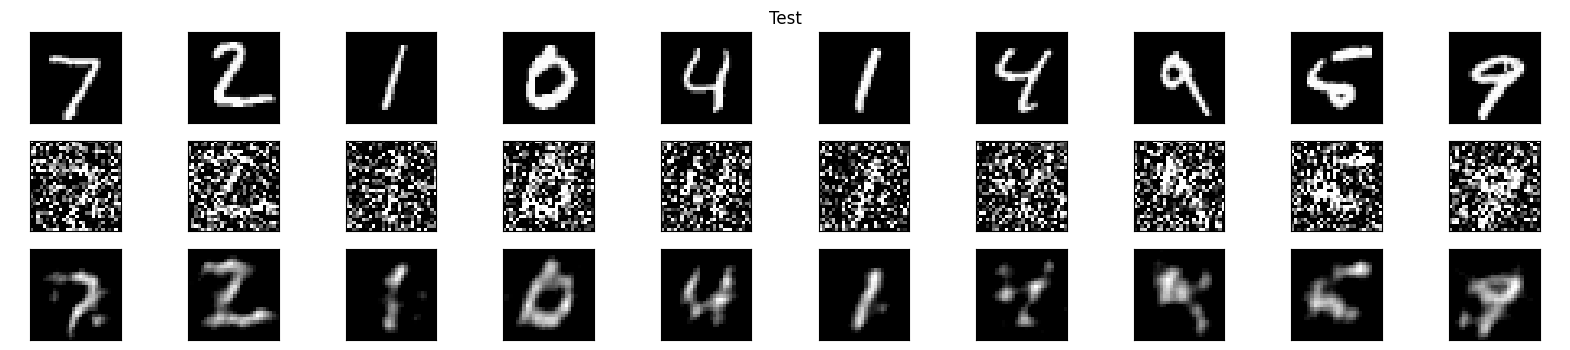

In [ ]:
n = 10
decoded_imgs = autoencoder.predict(x_test_noisy[:n])

plt.figure(figsize=(20, 4))
plt.title("Test")
plt.axis('off')
for i in range(10):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

### Exercise 1

1. Adjust the autoencoder to have **at least 2** other different bottleneck sizes, one larger and one smaller than the given dimensions. In the given example above, this dimension is (None, 4, 4, 8)->4x4x8=128.

2. You may (and should) spend a little time tuning the model hyper-parameters to try to achieve good results on each.

3. Visualize the results of applying each model to some samples from the train and test sets.

4. Write a brief discussion of your results comparing the performance of each model, with justufiction as to **why** you think these results occurred

In [ ]:
### CODE ....

In [ ]:
### FINAL EXPLANATION

## Task 2

For the second task, you must implement a de-noising autoencoder from scratch on a more real-world dataset.

In [ ]:
!wget https://github.com/gmprovan/CS6421-Assignment1/raw/master/train.zip
!wget https://github.com/gmprovan/CS6421-Assignment1/raw/master/test.zip
!wget https://github.com/gmprovan/CS6421-Assignment1/raw/master/train_cleaned.zip
!unzip train.zip
!unzip test.zip
!unzip train_cleaned.zip

--2025-03-13 12:27:00--  https://github.com/gmprovan/CS6421-Assignment1/raw/master/train.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gmprovan/CS6421-Assignment1/master/train.zip [following]
--2025-03-13 12:27:00--  https://raw.githubusercontent.com/gmprovan/CS6421-Assignment1/master/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19407030 (19M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>]  18.51M  --.-KB/s    in 0.08s   

2025-03-13 12:27:01 (231 MB/s) - ‘train.zip’ saved [19407030/19407030]

--2025-03-13 12:27:01--  https://github.co

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, array_to_img, img_to_array
import os
from sklearn.model_selection import train_test_split

X = []
Y = []

for img in os.listdir("train"):
    img = tf.keras.utils.load_img(f"train/{img}",color_mode="grayscale",target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in os.listdir("train_cleaned"):
    img = load_img(f"train_cleaned/{img}",color_mode="grayscale",target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)


X = np.array(X)
Y = np.array(Y)

x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)

X = []

for img in os.listdir("test"):
    img = tf.keras.utils.load_img(f"test/{img}",color_mode="grayscale",target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

x_test = np.array(X)

This dataset consists of scans of text documents that contain noise and artificats.

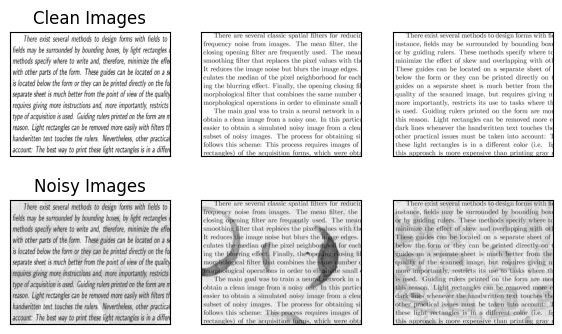

In [ ]:
n = 3
plt.figure(figsize=(7, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(y_train[i].reshape(420, 540))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
      ax.set_title('Clean Images')
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train[i].reshape(420, 540))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Noisy Images')

plt.show()


## Exercise 2

1. Implement a denoising CNN autoencoder on this data, observing that the size of your images are now  (420, 540, 1). Use MSE loss. These models will take longer to train, to try to start from what you expect to be a good starting set of hyper-parametrers. Try to make the bottleneck as small as possible.
2. Visualise the results of applying this autoencoder on the train and test data for different autoencoder sizes - focusing particularly on the bottleneck size.
3. A small number of marks are available for implementing the correct regularization on this model
4. Discuss and explain the performances of differnt models and bottleneck sizes similarly to task 1.